
## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ["label","SMS"]
df = pd.read_csv("SMSSpamCollection",delimiter='	',names=column_names)

In [3]:
df

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [35]:
lst =[]
lst = df['label'].value_counts()
lst

0    4825
1     747
Name: label, dtype: int64

In [5]:
import matplotlib.pyplot as plt

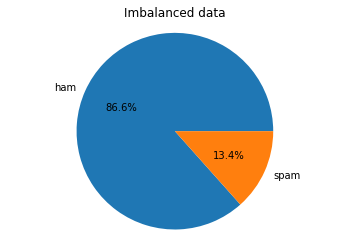

In [6]:
my_data = lst
my_labels = 'ham','spam'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Imbalanced data')
plt.axis('equal')
plt.show()

In [7]:
df_spam = df[df.label=='spam']
df_spam

,label,SMS
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
spam_list= df_spam['SMS'].tolist()
joined_string = ""
for i in range(len(spam_list)):
    joined_string += (spam_list[i] + ' ')
joined_string = joined_string.lower()
    

In [9]:
pip install wordcloud 

In [10]:
import os
from wordcloud import WordCloud
from PIL import Image
comment_mask = np.array(Image.open("image.png"))
#create and generate a word cloud image
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white").generate(joined_string)

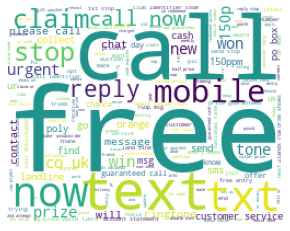

In [11]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Handle Imbalanced Datasets

In [12]:
df['label'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [38]:
from sklearn.utils import resample
df_majority = df[df.label==0]
df_minority = df[df.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4825,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.label.value_counts()

1    4825
0    4825
Name: label, dtype: int64

## Splitting the dataset

In [39]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled['SMS'],df_upsampled['label'],test_size=0.30)

In [51]:
X_test.shape

(2895,)

In [52]:
X_train.shape

(6755,)

## TF_IDF vectorization for feature extraction

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
lst = X_train.tolist()
vectorizer = TfidfVectorizer(input= lst , lowercase=True, stop_words='english' )
train_transformed = vectorizer.fit_transform(lst)
test_transformed  = vectorizer.transform(X_test)

## Train the model

In [55]:
from sklearn.naive_bayes import MultinomialNB
# train the model
classifier = MultinomialNB()
classifier.fit(train_transformed, y_train)

MultinomialNB()

In [56]:
print("classifier accuracy {:.2f}%".format(classifier.score(test_transformed, y_test) * 100))

classifier accuracy 97.86%


In [57]:
predicted = classifier.predict(test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1363   46]
 [  16 1470]]
Accuracy Score : 0.9785837651122625
Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1409
           1       0.97      0.99      0.98      1486

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895

F-Measure: 0.979


In [58]:
df_cm = pd.DataFrame(results)
df_cm

,0,1
0,1363,46
1,16,1470


In [59]:
import seaborn as sns

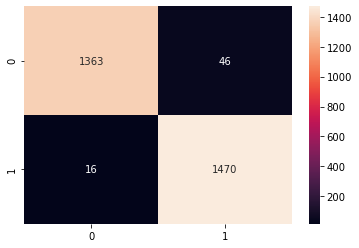

In [60]:
sns.heatmap(df_cm,annot=True,fmt="d")